<a href="https://colab.research.google.com/github/yahiroyudai/DeepLearning2022Late/blob/main/CNN%E3%81%A7%E7%94%BB%E5%83%8F%E5%88%86%E9%A1%9E2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNNで画像分類
CNNでCIFAR-10の画像データを訓練し、ネットなどの任意の画像を正しく分類できるかどうか確認

###学習のライブラリを読み込む

In [1]:
from keras.models import Sequential, Model #学習モデルのクラス
from keras.layers import Conv2D #畳み込み層のクラス
from keras.layers import Flatten #全結合層用のクラス
from keras.layers import Dense #(分類出力用の)普通のニューロン層
from keras.layers import MaxPooling2D
from keras.layers import Dropout

###データセットと表示用のライブラリもimportする
データセットはtensorflow内のCIFAR10

In [2]:
import tensorflow as tf #CIFAR10のために読み込む
from matplotlib import pyplot #グラフのプロット表示
import numpy as np #データ計算
import cv2 #computer vison画像を取り扱う

###CIFAR10を読み込む

In [3]:
cifar = tf.keras.datasets.cifar10

###CIFARからデータを読み込んで学習用とテスト検証用に振り分ける

In [4]:
(X_train, y_train), (x_test, y_test) = cifar.load_data() #データをロード

###CIFAR10の答え用のキーワード(ラベル)の配列を用意

In [5]:
labels = ["飛行機", "自動車", "鳥", "猫", "鹿", "犬", "カエル", "馬", "船", "トラック"]

###ロードしたデータを加工する

In [6]:
x_train = X_train.astype('float32')/255 #データの値を255で割って学習用にする
x_test = x_test.astype('float32')/255 

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [8]:
#ロードしたデータの数を確認
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

50000
10000
50000
10000


###ダウンロードした画像を表示する(一部だけ)

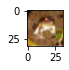

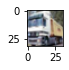

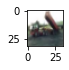

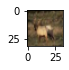

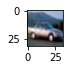

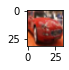

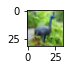

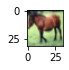

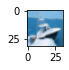

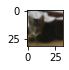

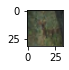

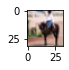

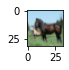

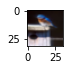

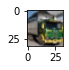

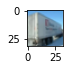

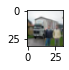

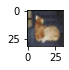

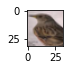

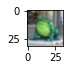

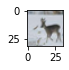

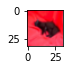

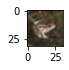

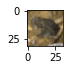

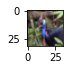

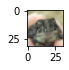

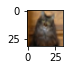

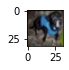

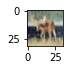

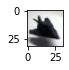

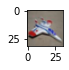

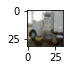

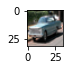

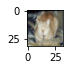

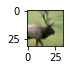

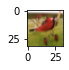

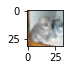

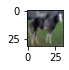

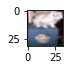

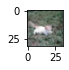

In [9]:
from PIL import Image
for i in range(0, 40):
  im = Image.fromarray(X_train[i])
  pyplot.subplot(5, 8, i+1)
  pyplot.imshow (im)
  # 繰り返しおわり
  pyplot.show()

###CNNの学習モデルを組み立てていく

In [10]:
#層をたくさん追加するので、リストでまとめて追加する
num_classes = len (labels) #分類数
in_shape = (32, 32, 3)
model = Sequential([
  Conv2D(32, (3, 3), padding='same', input_shape=in_shape),
  tf. keras. layers. Activation('relu'),
  Conv2D(32, (3, 3), padding='same'),
  tf.keras.layers.Activation('relu'),
  MaxPooling2D(pool_size = (2, 2)),
  Dropout(0.25),

  Conv2D(32, (3, 3), padding='same'),
  tf. keras. layers. Activation('relu'),
  Conv2D(32, (3, 3), padding='same'),
  tf.keras.layers.Activation('relu'),
  MaxPooling2D(pool_size = (2, 2)),
  Dropout(0.25),

  Flatten(),
  Dense(512),
  tf.keras.layers.Activation('relu'),
  Dropout(0.5),
  Dense (num_classes),
  tf.keras.layers.Activation ('softmax'),
])

###組み立てたデータをコンパイルする

In [11]:
model.compile(
    loss = 'categorical_crossentropy', #損失の計算法
    optimizer = 'adam',#最適化の方法
    metrics = ['accuracy'] #評価の基準
)

###組み立てた学習モデルで訓練する

In [12]:
fit = model.fit(
    x_train, y_train, #学習用問題データとその正解(ラベル)
    batch_size = 128, #まとめて学習する量
    epochs = 100, #学習を繰り返す回数
    verbose = 1, #ログ出力のフラグ(標準出力に出力する)
    validation_data = (x_test, y_test) #学習中の価検チェック用データ
)

Epoch 1/100
391/391 [==============================] - 11s 15ms/step - loss: 1.6243 - accuracy: 0.4065 - val_loss: 1.2886 - val_accuracy: 0.5367
Epoch 2/100
391/391 [==============================] - 4s 11ms/step - loss: 1.2375 - accuracy: 0.5565 - val_loss: 1.0694 - val_accuracy: 0.6186
Epoch 3/100
391/391 [==============================] - 5s 12ms/step - loss: 1.0596 - accuracy: 0.6235 - val_loss: 0.9423 - val_accuracy: 0.6666
Epoch 4/100
391/391 [==============================] - 4s 11ms/step - loss: 0.9612 - accuracy: 0.6604 - val_loss: 0.8661 - val_accuracy: 0.7003
Epoch 5/100
391/391 [==============================] - 4s 11ms/step - loss: 0.8837 - accuracy: 0.6892 - val_loss: 0.8030 - val_accuracy: 0.7210
Epoch 6/100
391/391 [==============================] - 4s 11ms/step - loss: 0.8233 - accuracy: 0.7090 - val_loss: 0.7572 - val_accuracy: 0.7338
Epoch 7/100
391/391 [==============================] - 4s 10ms/step - loss: 0.7816 - accuracy: 0.7255 - val_loss: 0.7352 - val_accuracy

###訓練の状況を確認する

In [13]:
#訓練の精度の経過を取得
acc = fit.history['accuracy']
#訓練の損失の経過を取得
loss = fit.history['loss']
#訓練の回数を算出
epochs = range(len(acc))

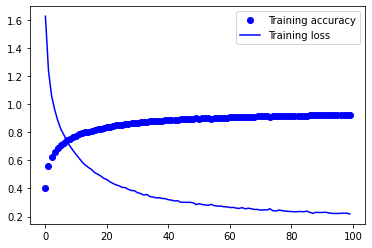

<Figure size 432x288 with 0 Axes>

In [14]:
#accとlossの値をプロットしていく
#精度(acc)を青いドット(bo)でプロット
pyplot.plot(epochs, acc, 'bo', label = 'Training accuracy')
#損失(loss)を青線(b)でプロット
pyplot.plot(epochs, loss, 'b', label = 'Training loss')
#凡例をつける
pyplot.legend()
#描画領域を設定
pyplot.figure()
pyplot.show() #表示 

###訓練した学習モデルで検証する

In [15]:
#コンパイルで指定したmetrics=accuracyで評価する
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.7291 - accuracy: 0.7943 - 881ms/epoch - 3ms/step


[0.729141116142273, 0.7943000197410583]

###学習済みのモデルに分類させていく
直接分類させるモデルにラッピングする

In [16]:
probability_model = Sequential([
  model,
  tf.keras.layers.Softmax()
])

###テスト検証データの一部を分類させる

['猫', '船', '船', '飛行機', 'カエル', 'カエル', '自動車', 'カエル']


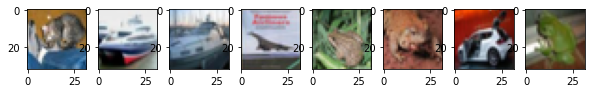

In [17]:
tests = x_test[:8] #一部を切り抜く
#切り抜いたデータをプロットで表示
pyplot.figure(figsize=(10, 10))
for i in range (0, len(tests)):
  pyplot.subplot (1, len(tests), i+1)
  pyplot.imshow(tests[i], cmap='gray')
#ループ終わり
#testsの内容を表示出来たら、分類用のprobability_modelに分類させる(解答させる）
r = probability_model(tests)#分類結果を変数にに代入
#print(r)
#分類結果の回答(r)の中から各行の一番高い確率を抜き出して、そのインデックスを格納する配列を用意
result = []
#ループしながらrに追加していく
for i in np.argmax(r.numpy(),axis = 1):
  result.append(labels[i])
#ループ終わり
print(result)

###画像をアップロードする処理を作る

Saving chiwawa10.jpeg to chiwawa10.jpeg


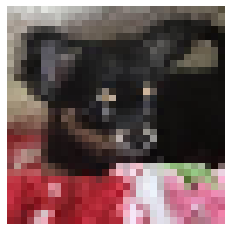

In [21]:
from google.colab import files
r = files.upload() #ファイルをアップロード(ボタンが出る）
if len(r)==0: #もしデータが空だったら、失敗とみなす
  print("ファイルをアップロードできませんでした")
else: #成功ルート
  filename=list(r.keys())[0] #データのキーの先頭をファイル名として取得
  img = cv2.imread(filename) #画像データを読み込む
  import os
  os.remove(filename) #ファイルを掃除
#画像データの色情報の方式を変換 ComputerVisionのBGRからRGBに変換
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #変換してimgを上書き
  img = cv2.resize(img, (32,32)) #リサイズしてimgを上書き
  pyplot.imshow(img) #プロットに設定
  pyplot.axis("off") #斜線をオフ
  pyplot.show() #画像を表示

###アップロードした画像を分類させる

In [22]:
#画像データと学習データと同じ形に整形する
img = img.reshape(1, 32, 32, 3)
ans = probability_model([img]) #学習済みモデルで判定
print(ans) #分類結果を表示

tf.Tensor(
[[0.08533675 0.08533675 0.08533675 0.08533675 0.08533675 0.08533675
  0.08533675 0.23196931 0.08533675 0.08533675]], shape=(1, 10), dtype=float32)


###一番高い可能性のインデックスをキーワードに変換して表示

In [23]:
answer_idx = int(np.argmax(ans, axis=1))
print(answer_idx)
answer_word = labels[answer_idx]
print("この画像は" + answer_word + "です")

7
この画像は馬です
